<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Task 3 - Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### TASK 4 - 
    For the "Median value of owner-occupied homes" provide a boxplot<br>
    Provide a  bar plot for the Charles river variable<br>
    Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)<br>
    Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?<br>
    Create a histogram for the pupil to teacher ratio variable

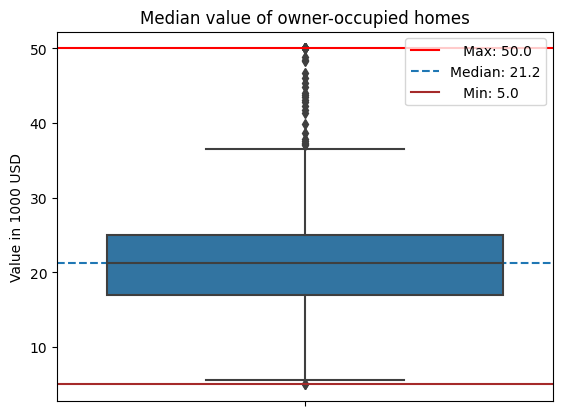

In [5]:
#For the "Median value of owner-occupied homes" provide a boxplot

graph = sns.boxplot(data = boston_df, y = 'MEDV')
graph.axhline(boston_df.MEDV.max(), linestyle = 'solid', color = 'red', label = '   Max: '+str(boston_df.MEDV.max()))
graph.axhline(boston_df.MEDV.median(), linestyle = 'dashed', label = 'Median: '+str(boston_df.MEDV.median()))
graph.axhline(boston_df.MEDV.min(), linestyle = 'solid', color='brown', label = '   Min: '+str(boston_df.MEDV.min()))
pyplot.title("Median value of owner-occupied homes")
pyplot.ylabel("Value in 1000 USD")
pyplot.legend()
pyplot.show()

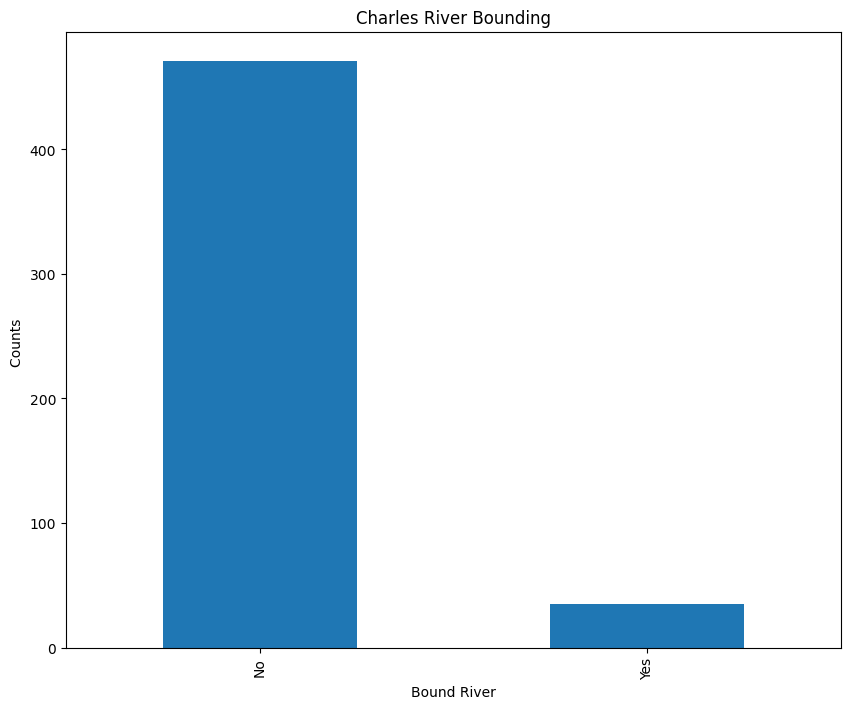

In [6]:
#Provide a  bar plot for the Charles river variable

bar_data = boston_df['CHAS'].value_counts()
bar_data.index = ['No', 'Yes']
bar_data.plot(kind='bar',figsize=(10,8))

pyplot.title("Charles River Bounding")
pyplot.xlabel("Bound River")
pyplot.ylabel("Counts ")
pyplot.show()

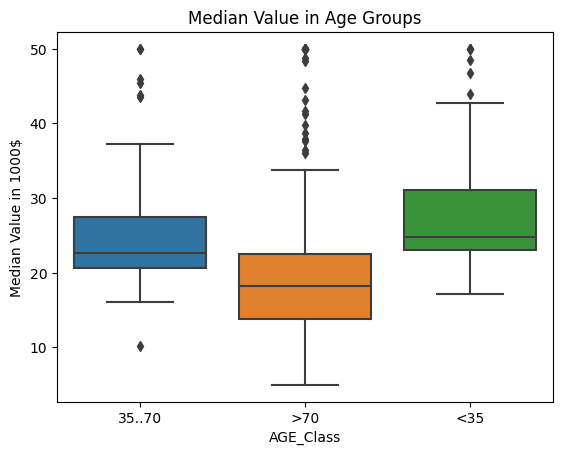

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[boston_df['AGE']<35.0,'AGE_Class']  = '<35'
boston_df.loc[((boston_df['AGE']>=35.0) & (boston_df['AGE']<=70.0)),'AGE_Class']  =  '35..70'
boston_df.loc[boston_df['AGE']>=70.0,'AGE_Class']  = '>70'
sns.boxplot(data = boston_df, x = 'AGE_Class' , y='MEDV')
pyplot.ylabel('Median Value in 1000$')
pyplot.title('Median Value in Age Groups')
pyplot.show()

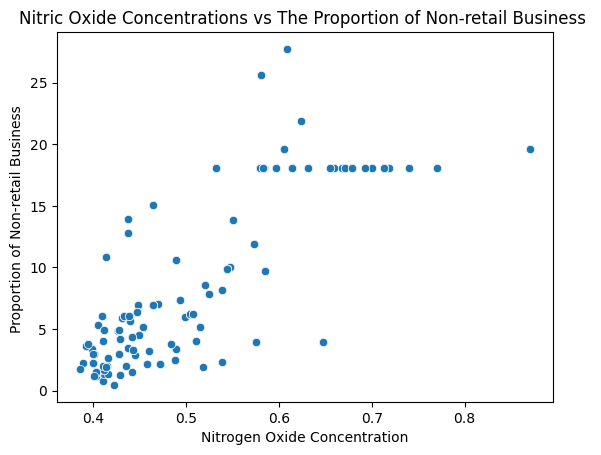

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(data=boston_df, x = 'NOX', y = 'INDUS')
pyplot.xlabel('Nitrogen Oxide Concentration')
pyplot.ylabel('Proportion of Non-retail Business ')
pyplot.title('Nitric Oxide Concentrations vs The Proportion of Non-retail Business ')
pyplot.show()


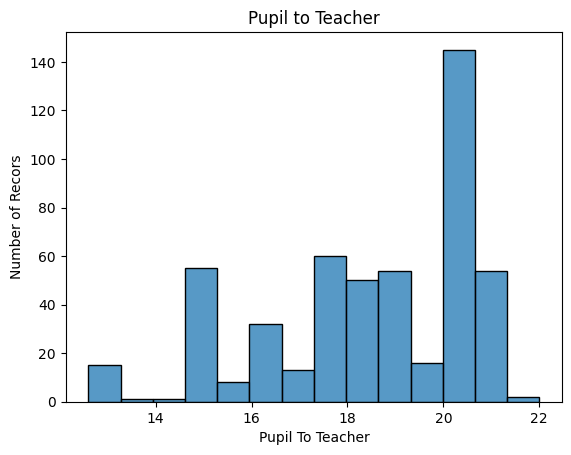

In [9]:
#Create a histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x = 'PTRATIO')
pyplot.xlabel('Pupil To Teacher')
pyplot.ylabel('Number of Recors')
pyplot.title('Pupil to Teacher')
pyplot.show()


#### Conclusions:
- Owner occupied hauses are in price range 5 to 50 thausand dollars with a median of 21,200$
- Most of the houses are away from the Charles River
- Median prices for age groups in ascending order are: 'younger than 35', 'between 35 and 70' and 'older than 70'
- Scatterplot shows a positive relation between NOX level and Non-retail businesses
- Pupil to Teacher ratio varies between 13 (for 12 records) and 21.1 (for a single record) and max ratio is 140

#### TASK 5 - 
    Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
    Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
    Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
    What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

    State your hypothesis.

    Use α = 0.05

    Perform the test Statistics.

    State the conclusion from the test.

In [10]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Null hyphotesis: There is no significant difference in median value of houses bounded by the Charles river
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by Charles River

In [11]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
# Null hyphotesis: There is no significant difference in median value of houses puilt prior to 1940

thirtyfive_lower = boston_df[boston_df['AGE_Class'] == '<35']['MEDV']
thrtyfive_seventy = boston_df[boston_df['AGE_Class'] == '35..70']['MEDV']
seventy_older = boston_df[boston_df['AGE_Class'] == '>70']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thrtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses by age

In [12]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Null hyphotesis: There is no relation between Nitric oxide concentrations and proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical relation between Nitric oxide concentrations and proportion of non-retail business acres per town

In [13]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 24 Sep 2023   Prob (F-statistic):           1.21e-08
Time:                        14:47:42   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** p < 0.05 there is evidence of correlation between distance to business centers and median value
